In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from surprise import KNNWithMeans,SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split,cross_validate

In [3]:
df_activity = pd.read_csv('data/activity_data.csv')
df_activity.sample(2)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
1796,5145,LAYING,0.693,0.0648,-0.509,-0.774,-0.598,-0.670,-0.764,-0.633,...,-0.311,-0.348,-0.749,0.1060,0.228,0.115,0.0446,0.660,-0.683,-0.31300
739,2120,LAYING,0.281,-0.0178,-0.116,-0.995,-0.995,-0.992,-0.996,-0.995,...,0.608,-0.549,-0.831,0.0699,-0.101,0.507,0.0715,0.366,-0.847,-0.00332


# Pre-processing of Data

In [4]:
df_activity.shape

(3609, 563)

In [8]:
print(f'The number of nulls in the data: {df_activity.isnull().sum().sum()}')

The number of nulls in the data: 0


In [11]:
print(f'The number of duplicate rows in data: {df_activity.duplicated().sum()}')

The number of duplicate rows in data: 0


### Check Imbalance data

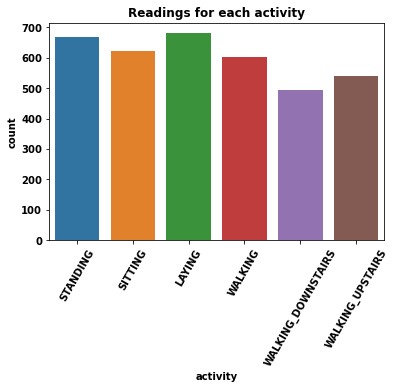

In [18]:
plt.title('Readings for each activity')
sns.countplot(data=df_activity, x='activity')
plt.xticks(rotation=60)
plt.show()

### Clustering we don't need Activity

In [20]:
df_activity.set_index(keys='rn', inplace=True)
df_activity.drop(columns='activity', inplace=True)
df_activity.sample(2)

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
rn,,,,,,,,,,,,,,,,,,,,,
6173,0.270,0.00929,-0.0802,-0.340,-0.192,-0.336,-0.401,-0.188,-0.341,0.124,...,0.213,-0.193,-0.515,0.2470,-0.417,-0.6470,0.141,-0.707,0.232,0.174
2578,0.272,-0.01430,-0.1030,-0.997,-0.993,-0.990,-0.997,-0.994,-0.990,-0.943,...,0.387,-0.683,-0.876,-0.0187,0.219,-0.0772,0.055,-0.479,-0.228,-0.136


### Scaling of Data

In [21]:
sscalar = StandardScaler()

In [22]:
df_activity_sc = sscalar.fit_transform(df_activity)
df_activity_sc = pd.DataFrame(data=df_activity_sc, columns=df_activity.columns, index=df_activity.index)
df_activity_sc.sample(2)

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
rn,,,,,,,,,,,,,,,,,,,,,
8427,0.007177,0.077857,-0.032111,-0.884871,-0.934559,-0.897510,-0.879529,-0.928124,-0.893829,-0.883086,...,0.217261,-0.626527,-0.686434,0.241837,1.286489,-1.527529,1.623256,-0.618583,-0.307262,0.256167
5306,0.101546,0.303066,0.092422,-0.884871,-0.932565,-0.930054,-0.877109,-0.934306,-0.936880,-0.879383,...,0.142338,-0.956800,-0.666970,0.073266,0.370935,-0.771250,-1.797955,-0.661783,0.484991,0.173824


In [23]:
df_activity_corr = df_activity_sc.corr()

In [27]:
df_activity_corr.loc[np.where(df_activity_corr>0.8, 1, 0)>1].columns

Index(['tBodyAcc.mean.X', 'tBodyAcc.mean.Y', 'tBodyAcc.mean.Z',
       'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z', 'tBodyAcc.mad.X',
       'tBodyAcc.mad.Y', 'tBodyAcc.mad.Z', 'tBodyAcc.max.X',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=561)

In [ ]:
sns.heatmap(df_activity_corr, annot=True)

In [29]:
df_activity_cov = np.cov(df_activity_sc.T)
df_activity_cov

array([[ 1.00027716,  0.21683985, -0.3030599 , ..., -0.02715583,
         0.03375438,  0.02595159],
       [ 0.21683985,  1.00027716, -0.10459853, ...,  0.00478852,
         0.00805298, -0.03347895],
       [-0.3030599 , -0.10459853,  1.00027716, ...,  0.0138497 ,
        -0.01985221, -0.03166965],
       ...,
       [-0.02715583,  0.00478852,  0.0138497 , ...,  1.00027716,
        -0.76082855, -0.61192132],
       [ 0.03375438,  0.00805298, -0.01985221, ..., -0.76082855,
         1.00027716,  0.5525094 ],
       [ 0.02595159, -0.03347895, -0.03166965, ..., -0.61192132,
         0.5525094 ,  1.00027716]])

<AxesSubplot:>

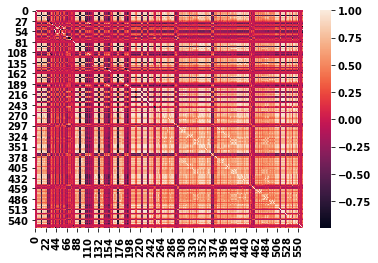

In [30]:
sns.heatmap(df_activity_cov)

### Compute Prinicipal Components to capture 90 variance

In [31]:
eig_vals, eig_vecs = np.linalg.eig(df_activity_cov)

In [32]:
eig_vals

array([ 2.85163265e+02+0.00000000e+00j,  3.63866414e+01+0.00000000e+00j,
        1.54898015e+01+0.00000000e+00j,  1.32842053e+01+0.00000000e+00j,
        1.06250291e+01+0.00000000e+00j,  9.03274398e+00+0.00000000e+00j,
        7.64641732e+00+0.00000000e+00j,  6.70178820e+00+0.00000000e+00j,
        5.33252664e+00+0.00000000e+00j,  5.17035746e+00+0.00000000e+00j,
        4.95104587e+00+0.00000000e+00j,  4.51617266e+00+0.00000000e+00j,
        4.36520755e+00+0.00000000e+00j,  3.78793307e+00+0.00000000e+00j,
        3.65425803e+00+0.00000000e+00j,  3.56651872e+00+0.00000000e+00j,
        3.22629307e+00+0.00000000e+00j,  3.22081407e+00+0.00000000e+00j,
        3.09420891e+00+0.00000000e+00j,  3.06248693e+00+0.00000000e+00j,
        2.92174816e+00+0.00000000e+00j,  2.89365265e+00+0.00000000e+00j,
        2.69013745e+00+0.00000000e+00j,  2.64460737e+00+0.00000000e+00j,
        2.58292314e+00+0.00000000e+00j,  2.50628422e+00+0.00000000e+00j,
        2.40197198e+00+0.00000000e+00j,  2.28274698

In [33]:
eig_vecs

array([[ 1.51578157e-03+0.00000000e+00j,  1.97913569e-02+0.00000000e+00j,
        -2.80525116e-02+0.00000000e+00j, ...,
         2.14653040e-15+0.00000000e+00j,  2.96215042e-16+7.08993635e-16j,
         2.96215042e-16-7.08993635e-16j],
       [-2.81310046e-03+0.00000000e+00j, -3.36473678e-03+0.00000000e+00j,
         7.89296373e-03+0.00000000e+00j, ...,
        -1.54402754e-15+0.00000000e+00j, -2.04630542e-16-2.26187438e-15j,
        -2.04630542e-16+2.26187438e-15j],
       [-2.14047262e-03+0.00000000e+00j, -7.22666065e-03+0.00000000e+00j,
         2.19652401e-02+0.00000000e+00j, ...,
        -1.37824366e-15+0.00000000e+00j,  5.94477536e-17+2.50626255e-16j,
         5.94477536e-17-2.50626255e-16j],
       ...,
       [-2.30748502e-02+0.00000000e+00j,  2.69233456e-02+0.00000000e+00j,
         9.35821155e-02+0.00000000e+00j, ...,
         2.07253774e-14+0.00000000e+00j,  3.03135259e-15+1.60148651e-14j,
         3.03135259e-15-1.60148651e-14j],
       [ 2.85023005e-02+0.00000000e+00j, -4.

In [37]:
eig_vecs[0]

array([ 1.51578157e-03+0.00000000e+00j,  1.97913569e-02+0.00000000e+00j,
       -2.80525116e-02+0.00000000e+00j, -1.58897694e-02+0.00000000e+00j,
        4.08939210e-03+0.00000000e+00j,  3.11688201e-04+0.00000000e+00j,
        2.36399777e-02+0.00000000e+00j, -7.10644332e-02+0.00000000e+00j,
       -6.01287447e-02+0.00000000e+00j,  3.36697941e-02+0.00000000e+00j,
        8.86372076e-02+0.00000000e+00j, -6.91205521e-02+0.00000000e+00j,
       -1.30035969e-02+0.00000000e+00j,  1.00304310e-02+0.00000000e+00j,
        1.55720572e-02+0.00000000e+00j,  4.39880514e-03+0.00000000e+00j,
       -3.84896321e-02+0.00000000e+00j, -5.40810842e-03+0.00000000e+00j,
       -3.04913917e-02+0.00000000e+00j,  1.23704790e-02+0.00000000e+00j,
       -2.14634648e-02+0.00000000e+00j, -1.99156996e-02+0.00000000e+00j,
        2.33010638e-02+0.00000000e+00j,  1.15773518e-03+0.00000000e+00j,
       -4.43828987e-02+0.00000000e+00j,  5.57967149e-02+0.00000000e+00j,
       -7.37634552e-02+0.00000000e+00j,  6.53846879

In [38]:
len(eig_vecs), len(eig_vecs[0])

(561, 561)

In [39]:
eig_pairs = [(np.abs(eig_vals[i], eig_vecs[:, i]))  for i in range(len(eig_vals))]

In [40]:
tot = sum(eig_vals)

var_exp = [(i/tot)*100  for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[ 50.817157  +0.00000000e+00j  57.30139216+0.00000000e+00j
  60.06173253+0.00000000e+00j  62.42902744+0.00000000e+00j
  64.32244724+0.00000000e+00j  65.93211589+0.00000000e+00j
  67.29473597+0.00000000e+00j  68.48901961+0.00000000e+00j
  69.43929574+0.00000000e+00j  70.36067271+0.00000000e+00j
  71.24296754+0.00000000e+00j  72.04776635+0.00000000e+00j
  72.82566261+0.00000000e+00j  73.5006864 +0.00000000e+00j
  74.15188881+0.00000000e+00j  74.78745574+0.00000000e+00j
  75.36239319+0.00000000e+00j  75.93635427+0.00000000e+00j
  76.48775383+0.00000000e+00j  77.03350042+0.00000000e+00j
  77.55416683+0.00000000e+00j  78.06982652+0.00000000e+00j
  78.54921905+0.00000000e+00j  79.02049794+0.00000000e+00j
  79.48078447+0.00000000e+00j  79.92741367+0.00000000e+00j
  80.35545403+0.00000000e+00j  80.76224805+0.00000000e+00j
  81.1608539 +0.00000000e+00j  81.53870691+0.00000000e+00j
  81.90989839+0.00000000e+00j  82.27365718+0.00000000e+00j
  82.62963386+0.00000000e+00j  82.97252146+0.00000000e+0

In [41]:
eig_values_90 = [i for i in cum_var_exp if i<90]
eig_values_90

[(50.81715700066469+0j),
 (57.30139215825244+0j),
 (60.061732527981405+0j),
 (62.4290274386041+0j),
 (64.32244723944382+0j),
 (65.93211589199593+0j),
 (67.29473596504175+0j),
 (68.48901960740994+0j),
 (69.4392957354557+0j),
 (70.36067271001325+0j),
 (71.24296754156589+0j),
 (72.04776634729103+0j),
 (72.82566260763828+0j),
 (73.50068640280149+0j),
 (74.15188880730318+0j),
 (74.7874557398732+0j),
 (75.36239319243342+0j),
 (75.93635426790959+0j),
 (76.48775383127226+0j),
 (77.03350041924608+0j),
 (77.55416683446862+0j),
 (78.06982652404045+0j),
 (78.54921904753624+0j),
 (79.02049794097172+0j),
 (79.48078447412323+0j),
 (79.92741366607845+0j),
 (80.35545402753614+0j),
 (80.76224804910011+0j),
 (81.16085389709+0j),
 (81.53870690858932+0j),
 (81.90989838617672+0j),
 (82.273657176695+0j),
 (82.62963386138262+0j),
 (82.97252145885419+0j),
 (83.30484126865232+0j),
 (83.63203487380028+0j),
 (83.95009377083754+0j),
 (84.2581928105811+0j),
 (84.55514227811223+0j),
 (84.84177353315161+0j),
 (85.124

In [42]:
len(eig_values_90)

63

In [43]:
mod_pca = PCA(n_components=64)
df_activity_sc_pca = mod_pca.fit_transform(df_activity_sc)

In [44]:
mod_pca.explained_variance_ratio_

array([0.50817157, 0.06484235, 0.0276034 , 0.02367295, 0.0189342 ,
       0.01609669, 0.0136262 , 0.01194284, 0.00950276, 0.00921377,
       0.00882295, 0.00804799, 0.00777896, 0.00675023, 0.00651202,
       0.00635565, 0.00574935, 0.00573959, 0.00551398, 0.00545742,
       0.00520662, 0.00515656, 0.00479375, 0.00471263, 0.0046027 ,
       0.00446612, 0.00428013, 0.00406773, 0.00398594, 0.00377795,
       0.00371149, 0.00363716, 0.00355873, 0.00342814, 0.00331834,
       0.0032711 , 0.00317849, 0.00307788, 0.0029669 , 0.00285734,
       0.00281963, 0.00273397, 0.00266193, 0.00258593, 0.00254353,
       0.00251399, 0.00246531, 0.00242195, 0.00234961, 0.00229234,
       0.0022333 , 0.00219366, 0.00211523, 0.00209683, 0.00206703,
       0.00206316, 0.00195269, 0.00190738, 0.00187316, 0.00182757,
       0.00178887, 0.00174991, 0.00173587, 0.00169354])

### Top 5 Prinipal Components

In [47]:
[mod_pca.explained_variance_[i] for i in range(len(mod_pca.explained_variance_)) if i<6]

[285.1632652556503,
 36.38664142897687,
 15.4898014667769,
 13.284205303372056,
 10.625029118819393,
 9.032743974873693]

In [48]:
mod_pca.components_

array([[ 0.00151578, -0.0028131 , -0.00214047, ..., -0.02307485,
         0.0285023 ,  0.02569731],
       [ 0.01979136, -0.00336474, -0.00722666, ...,  0.02692335,
        -0.04065611, -0.02076269],
       [-0.0280525 ,  0.00789302,  0.02196524, ...,  0.0935821 ,
        -0.06951256, -0.06051882],
       ...,
       [ 0.01878285,  0.01316425,  0.18515676, ...,  0.01614781,
         0.00976568,  0.02472328],
       [-0.00902423, -0.0242752 , -0.02402473, ..., -0.02384004,
         0.01509936, -0.00909729],
       [ 0.04592563, -0.00869831,  0.04492699, ..., -0.01278828,
        -0.05837679,  0.04367168]])

### K-Means Clustering

### Dendogram

##### Plotting Dendograms with different linkage

In [49]:
link_single = linkage(df_activity_sc, method='single')
link_complete = linkage(df_activity_sc, method='complete')
link_average = linkage(df_activity_sc, method='average')
link_ward = linkage(df_activity_sc, method='ward')

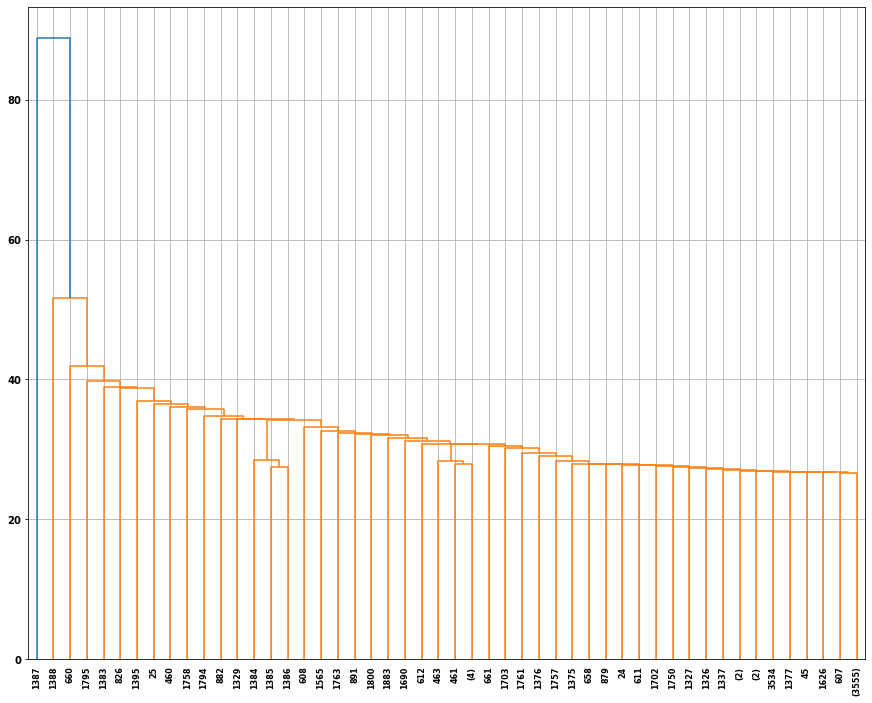

In [60]:
plt.rcParams['figure.figsize'] = (15, 12)
dendrogram(link_single, truncate_mode='lastp', p=50)
plt.grid()
plt.show()

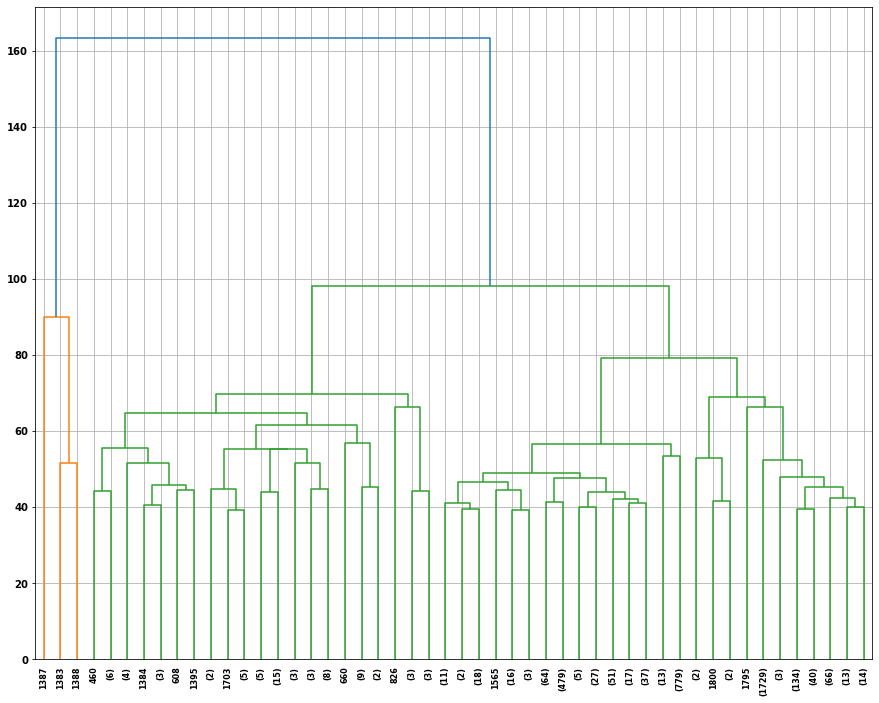

In [61]:
dendrogram(link_complete, truncate_mode='lastp', p=50)
plt.grid()
plt.show()

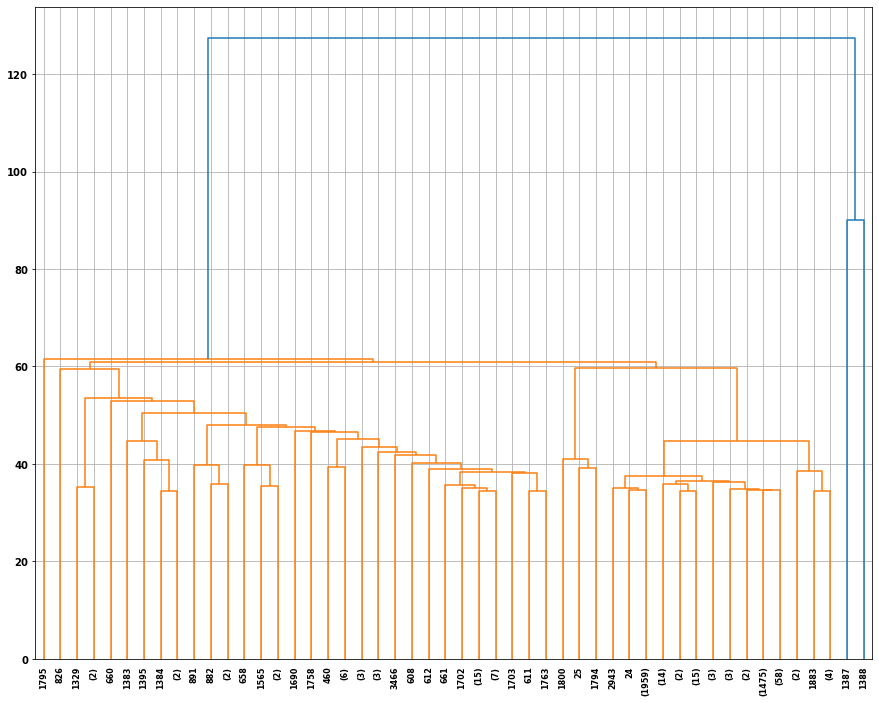

In [62]:
dendrogram(link_average, truncate_mode='lastp', p=50)
plt.grid()
plt.show()

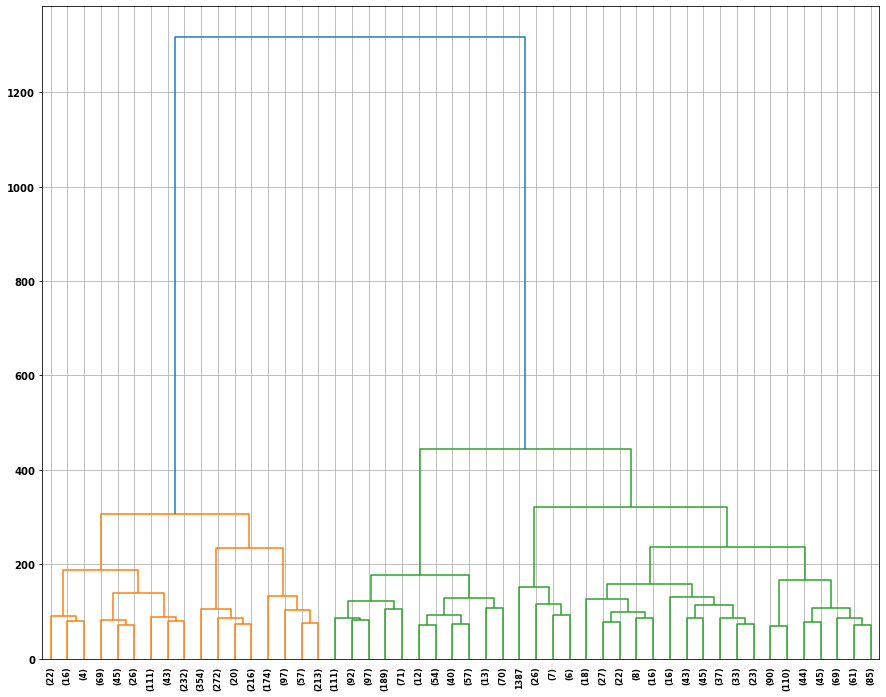

In [63]:
dendrogram(link_ward, truncate_mode='lastp', p=50)
plt.grid()
plt.show()